In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotnine
import collections as col
import seaborn as sns


data=pd.read_csv(r'C:\Users\asus\Desktop\NEWELECTRICITY.csv')
data.head()

C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.


,Column_1,row,week day,unique row,Unnamed: 3,date,report time,CT,UDC,UDCC,...,CN,CPN,TNOS,reporter,TOO,WR,year,month,day,Recoded report time
0,0,1,سه شنبه,1087467426,*,1395/01/31,22:33,22:50,NaN,0,...,NaN,*,0,مشترک,---,---,1395,1,31,22
1,1,2,سه شنبه,1087467260,*,1395/01/31,19:22,19:30,NaN,0,...,NaN,*,0,مشترک,---,---,1395,1,31,19
2,2,3,سه شنبه,1157467260,*,1395/01/31,19:21,19:33,NaN,0,...,NaN,*,0,مشترک,---,---,1395,1,31,19
3,3,4,سه شنبه,1157467172,*,1395/01/31,18:25,18:35,NaN,0,...,NaN,*,0,مشترک,---,---,1395,1,31,18
4,4,5,سه شنبه,1087467163,*,1395/01/31,18:20,19:00,NaN,0,...,NaN,*,0,مشترک,---,---,1395,1,31,18


In [2]:
data.shape

(18265, 46)

In [3]:
data['TOD'].value_counts()

انشعابات مشتركان                      7720
خطوط زميني فشارضعيف                   2705
خطوط هوائي فشارضعيف                   2051
طرف فشارضعيف پستهاي توزيع             1955
شبكه فشار متوسط هوائي                  964
طرف فشار متوسط پست هاي توزيع زميني     788
طرف فشارمتوسط پستهاي توزيع هوائي       755
شبكه فشار متوسط زميني                  678
كابل خودنگهدار فشارضعيف                264
كمبود توليد                            250
فوق توزيع                              111
روشنايي معابر                           19
انتقال                                   5
Name: TOD, dtype: int64

__how much time it take from reporting till checking__


In [87]:
data['report time'] = pd.to_datetime(data['report time'])
#data['report time'] = data['report time'].dt.time
data['CT'] = pd.to_datetime(data['CT'])
#data['CT'] = data['CT'].dt.time


In [88]:
data[['report time','CT','PST','DOFD']]


,report time,CT,PST,DOFD
0,2021-05-11 22:33:00,2021-05-11 22:50:00,23:0,27
1,2021-05-11 19:22:00,2021-05-11 19:30:00,19:35,13
2,2021-05-11 19:21:00,2021-05-11 19:33:00,19:35,14
3,2021-05-11 18:25:00,2021-05-11 18:35:00,18:37,12
4,2021-05-11 18:20:00,2021-05-11 19:00:00,19:20,60
...,...,...,...,...
18260,2021-05-11 10:31:00,2021-05-11 10:40:00,10:45,14
18261,2021-05-11 09:32:00,2021-05-11 09:40:00,9:45,13
18262,2021-05-11 06:58:00,2021-05-11 07:45:00,8:0,62
18263,2021-05-11 02:57:00,2021-05-11 03:30:00,4:3,66


In [89]:
data['DTCT'] = data['CT'].sub(data['report time'], axis=0)
data['DTCT'].head()

0   0 days 00:17:00
1   0 days 00:08:00
2   0 days 00:12:00
3   0 days 00:10:00
4   0 days 00:40:00
Name: DTCT, dtype: timedelta64[ns]

In [90]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.loc[data['DTCT'].idxmax()])

row                                            265
week day                                      جمعه
unique row                              1157450674
Unnamed: 3                                     NaN
date                                    1395/01/20
report time                    2021-05-11 01:19:00
CT                             2021-05-11 10:28:00
UDC                                            NaN
UDCC                                             0
MPF                                            NaN
MPFC                                             0
DC                                             NaN
DCC                                            NaN
WPF                                              0
voltage                                  فشار ضعيف
TOD                               انشعابات مشتركان
COB                           اشكال در شبكه داخليD
p                                              NaN
COP                                            NaN
IRC                            

In [91]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.loc[data['DOFD'].idxmax()])

row                                                            292
week day                                                   پنجشنبه
unique row                                              1058084926
Unnamed: 3                                                     NaN
date                                                    1396/02/14
report time                                    2021-05-11 05:42:00
CT                                             2021-05-11 06:15:00
UDC                                                             کن
UDCC                                                          2164
MPF                                                          سنگان
MPFC                                                      34044112
DC                                                             NaN
DCC                                                            NaN
WPF                                                              0
voltage                                                 فشار م

In [92]:
data['DTCT']

0       0 days 00:17:00
1       0 days 00:08:00
2       0 days 00:12:00
3       0 days 00:10:00
4       0 days 00:40:00
              ...      
18260   0 days 00:09:00
18261   0 days 00:08:00
18262   0 days 00:47:00
18263   0 days 00:33:00
18264   0 days 00:10:00
Name: DTCT, Length: 18265, dtype: timedelta64[ns]

In [11]:
dataset=data[['day','Recoded report time','year','month','COB','TOD','DOFD','week day']]
dataset.head()

,day,Recoded report time,year,month,COB,TOD,DOFD,week day
0,31,22,1395,1,اشكال در كابل سرويس,انشعابات مشتركان,27,سه شنبه
1,31,19,1395,1,اشكال در كابل سرويس,انشعابات مشتركان,13,سه شنبه
2,31,19,1395,1,اشكال در شبكه داخليD,انشعابات مشتركان,14,سه شنبه
3,31,18,1395,1,اشكال در لوازم اندازه گيري مشتركين غيرديماندي ...,انشعابات مشتركان,12,سه شنبه
4,31,18,1395,1,اشكال در كابل سرويس,انشعابات مشتركان,60,سه شنبه


In [15]:
dataset["COB"] = dataset["COB"].astype('category')
dataset.dtypes
dataset["TOD"] = dataset["TOD"].astype('category')
dataset.dtypes
dataset["week day"] = dataset["week day"].astype('category')

<ipython-input-15-9a787711db6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-9a787711db6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-9a787711db6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
dataset["COB"] = dataset["COB"].cat.codes
dataset["week day"] = dataset["week day"].cat.codes
dataset["TOD"] = dataset["TOD"].cat.codes
dataset.head()

<ipython-input-16-8ea9f498c2e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-16-8ea9f498c2e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-16-8ea9f498c2e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,day,Recoded report time,year,month,COB,TOD,DOFD,week day
0,31,22,1395,1,32,1,27,2
1,31,19,1395,1,32,1,13,2
2,31,19,1395,1,30,1,14,2
3,31,18,1395,1,35,1,12,2
4,31,18,1395,1,32,1,60,2


__TOD (predicted class)__


# Random forest


In [19]:
X = dataset.drop(['TOD'], axis=1)
y = dataset['TOD']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.33,random_state = 42)

In [21]:
X_train.shape,X_test.shape

((12237, 7), (6028, 7))

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('model: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

model: 0.9081


In [23]:
rcf_100 = RandomForestClassifier(n_estimators =100, random_state =0)

rcf_100.fit(X_train,y_train)

y_pred_100 =rcf_100.predict(X_train)

y_pred_100 = rcf_100.predict(X_test)

print('model:{0:0.4f}'.format(accuracy_score(y_test, y_pred)))



model:0.9081


In [24]:
clf = RandomForestClassifier(n_estimators =100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
feature_scores =pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

COB                    0.619878
DOFD                   0.132239
Recoded report time    0.066184
day                    0.063478
month                  0.053587
week day               0.040693
year                   0.023941
dtype: float64

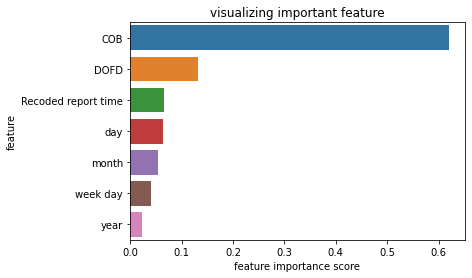

In [26]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('feature importance score')
plt.ylabel('feature')

plt.title("visualizing important feature")

plt.show()

In [58]:
X = dataset.drop(['TOD','year','month','week day'], axis=1)
y = dataset['TOD']


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.33,random_state = 42)

In [60]:
X_train.shape,X_test.shape

((12237, 4), (6028, 4))

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('model: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

model: 0.9589


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print('Confusion matric\n\n',cm)

Confusion matric

 [[   1    0    0    1    0    0    0    0    0    0    0    0    0]
 [   0 2559    5    1    0    0    0    2    0    1    0    0    0]
 [   0    0  854    2    0   13   13    1    3    0    0    0    0]
 [   0    0    2  648    0    2   11    3    2    2    0    1    0]
 [   0    0    2    1    2    0    1    0    0    0    0    0    0]
 [   0    2   13    1    1  164   18    0    0    2    0    1    0]
 [   0    1   13   25    0   15  268    0    0    1    0    1    0]
 [   0    0    2    1    0    5    2  219    3    8    0    4    0]
 [   0    0    7    2    0    0    5    0  654    1    0    3    0]
 [   0    1    5    1    0    6    2    6    3  219    0    2    0]
 [   0    0    3    0    0    3    2    1    0    3   23    0    0]
 [   0    0    0    1    0    0    2    1    0    0    0   81    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0   88]]


In [33]:
 from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00      2568
           2       0.94      0.96      0.95       886
           3       0.95      0.97      0.96       671
           4       0.67      0.33      0.44         6
           5       0.79      0.81      0.80       202
           6       0.83      0.83      0.83       324
           7       0.94      0.90      0.92       244
           8       0.98      0.97      0.98       672
           9       0.92      0.89      0.91       245
          10       1.00      0.66      0.79        35
          11       0.87      0.95      0.91        85
          12       1.00      1.00      1.00        88

    accuracy                           0.96      6028
   macro avg       0.91      0.83      0.86      6028
weighted avg       0.96      0.96      0.96      6028



# Decision Tree


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state= 0)

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_pred_gini = clf_gini.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print('model: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

model: 0.7377


In [38]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([8, 8, 8, ..., 2, 3, 1], dtype=int8)

In [39]:
print('model: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

model: 0.7361


__check for overfitting and underfitting__

In [40]:
print('Tarin set score: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))
print('Test set score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Tarin set score: 0.7377
Test set score: 0.7361


__Visualize decision tree__

[Text(334.8, 380.52, 'X[2] <= 36.5\ngini = 0.769\nsamples = 12237\nvalue = [3, 5152, 1819, 1380, 13, 476, 640, 544, 1283, 510\n76, 179, 162]'),
 Text(167.4, 271.8, 'X[2] <= 29.5\ngini = 0.437\nsamples = 6891\nvalue = [0, 5054, 989, 301, 5, 298, 119, 53, 13, 48, 9, 2\n0]'),
 Text(83.7, 163.07999999999998, 'X[2] <= 25.5\ngini = 0.648\nsamples = 1822\nvalue = [0, 0, 989, 301, 5, 285, 119, 53, 13, 46, 9, 2\n0]'),
 Text(41.85, 54.360000000000014, 'gini = 0.484\nsamples = 1414\nvalue = [0, 0, 987, 3, 5, 209, 88, 52, 13, 46, 9, 2, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.426\nsamples = 408\nvalue = [0, 0, 2, 298, 0, 76, 31, 1, 0, 0, 0, 0, 0]'),
 Text(251.10000000000002, 163.07999999999998, 'X[3] <= 7.5\ngini = 0.006\nsamples = 5069\nvalue = [0, 5054, 0, 0, 0, 13, 0, 0, 0, 2, 0, 0, 0]'),
 Text(209.25, 54.360000000000014, 'gini = 0.473\nsamples = 13\nvalue = [0, 8, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]'),
 Text(292.95, 54.360000000000014, 'gini = 0.004\nsamples = 5056\nvalue = [

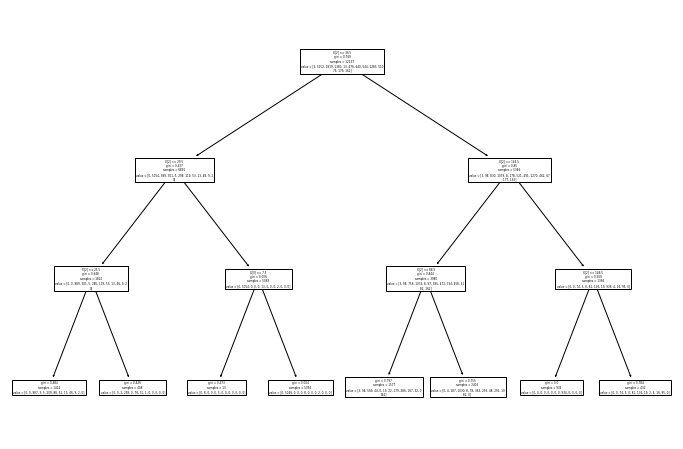

In [41]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train,y_train))

__criterian Entropy__


In [63]:
clf_en = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state= 0)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [64]:
y_pred_en = clf_en.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

print('model: {0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

model: 0.7377


In [67]:
y_pred_train_en= clf_gini.predict(X_train)


In [68]:
print('Tarin set score: {0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))
print('Test set score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_en)))

Tarin set score: 0.7377
Test set score: 0.7361
